## Insight 4
### Desde una perspectiva demográfica ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

Como vimos el peor momento de estos paises incluido Argentina y Colombia fué comprendido aproximadamente en Abril/20 y Enero/21 en ése periodo el índice de letalidad fué mayor.

![image-2.png](attachment:image-2.png)


Que según vimos en el Ingisht 3, el índice de letalidad fué:<br>
México: > 12%<br>
Argentina: 7,79%<br>
Colombia: 4,61%

Periodo: <br>
Abril/20 ~ Enero/21

Analizaremos el feature importances del índice de letalidad comprendido en éste periodo

### Importing libraries 

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importing the data

#### Population data

Importing demographic world information from an excel file

In [49]:
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)

In [50]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20596 entries, 0 to 20595
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           20596 non-null  int64  
 1   Variant                                                                                         20596 non-null  object 
 2   Region, subregion, country or area *                                                            20596 non-null  object 
 3   Notes                                                                                           5475 non-null   object 
 4   Location code                                                                                   20596 non-null  int64  
 5   ISO3 Alpha-

we'll select interest columns and then rename them

In [51]:
df_population_limpio = df_population[[
  'Year',
  'ISO2 Alpha-code',
  'Total Population, as of 1 July (thousands)',
  'Male Population, as of 1 July (thousands)',
  'Female Population, as of 1 July (thousands)',
  'Population Density, as of 1 July (persons per square km)',
  'Life Expectancy at Birth, both sexes (years)']].rename(columns = {
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
  }).copy()

we just need check population information between 2020 and 2021 years where lethality rate was upper

In [52]:
inf = df_population_limpio['Year'] >= 2020 
sup = df_population_limpio['Year'] <= 2021
df_population_limpio = df_population_limpio[inf & sup]

In [53]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 70 to 20595
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                572 non-null    float64
 1   Country_code        472 non-null    object 
 2   Total_Population    572 non-null    object 
 3   Male_Population     572 non-null    object 
 4   Female_Population   572 non-null    object 
 5   Population_Density  572 non-null    object 
 6   Life_Expectancy     572 non-null    object 
dtypes: float64(1), object(6)
memory usage: 35.8+ KB


Formating data structures

In [54]:
df_population_limpio['Male_Population'] = pd.to_numeric(df_population_limpio['Male_Population'], errors='coerce')
df_population_limpio['Female_Population'] = pd.to_numeric(df_population_limpio['Female_Population'], errors='coerce')
df_population_limpio['Life_Expectancy'] = pd.to_numeric(df_population_limpio['Life_Expectancy'], errors='coerce')

df_population_limpio = df_population_limpio.astype({
  'Year': 'int',
  'Total_Population': 'float',
  'Male_Population': 'float',
  'Female_Population': 'float',
  'Population_Density': 'float',
  'Life_Expectancy': 'float'
})

Checking NaNs values

In [55]:
df_population_limpio.isna().sum()

Year                    0
Country_code          100
Total_Population        0
Male_Population         2
Female_Population       2
Population_Density      0
Life_Expectancy         2
dtype: int64

Droping NaNs values before continue with the data structure formating

In [56]:
df_population_limpio.dropna(inplace=True)

In [57]:
df_population_limpio['Total_Population'] = df_population_limpio['Total_Population'].round(0).astype('int64')
df_population_limpio['Male_Population'] = df_population_limpio['Male_Population'].round(0).astype('int64')
df_population_limpio['Female_Population'] = df_population_limpio['Female_Population'].round(0).astype('int64')
df_population_limpio['Population_Density'] = df_population_limpio['Population_Density'].round(0).astype('int64')
df_population_limpio['Life_Expectancy'] = df_population_limpio['Life_Expectancy'].round(0).astype('int64')

df_population_limpio[['Total_Population','Male_Population','Female_Population']] = df_population_limpio[['Total_Population','Male_Population','Female_Population']]*1000

In [58]:
df_population_limpio.reset_index(inplace=True, drop=True)

In [59]:
df_population_limpio.isna().sum()

Year                  0
Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [60]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                470 non-null    int32 
 1   Country_code        470 non-null    object
 2   Total_Population    470 non-null    int64 
 3   Male_Population     470 non-null    int64 
 4   Female_Population   470 non-null    int64 
 5   Population_Density  470 non-null    int64 
 6   Life_Expectancy     470 non-null    int64 
dtypes: int32(1), int64(5), object(1)
memory usage: 24.0+ KB


#### Covid data

Importing Covid data

In [61]:
df_covid_limpio = pd.read_csv('covid_clean.csv', sep=';')

In [62]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      48902 non-null  object 
 1   Country_code       48902 non-null  object 
 2   Country            48902 non-null  object 
 3   New_cases          48902 non-null  int64  
 4   Cumulative_cases   48902 non-null  int64  
 5   New_deaths         48902 non-null  int64  
 6   Cumulative_deaths  48902 non-null  int64  
 7   lethality_rate     48902 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 3.0+ MB


Formating data structures

In [63]:
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      48902 non-null  datetime64[ns]
 1   Country_code       48902 non-null  object        
 2   Country            48902 non-null  object        
 3   New_cases          48902 non-null  int64         
 4   Cumulative_cases   48902 non-null  int64         
 5   New_deaths         48902 non-null  int64         
 6   Cumulative_deaths  48902 non-null  int64         
 7   lethality_rate     48902 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


Filtering by date_reported. We are interested just on that reports between 2020 and 2021 years

In [64]:
df_covid_limpio['Date_reported'].value_counts().sort_index()

Date_reported
2020-01-05    232
2020-01-12    232
2020-01-19    232
2020-01-26    232
2020-02-02    230
             ... 
2023-12-24    232
2023-12-31    232
2024-01-07    232
2024-01-14    232
2024-01-21    232
Name: count, Length: 212, dtype: int64

In [65]:
april20 = df_covid_limpio['Date_reported'] >= "2020-04-01"
jan21 = df_covid_limpio['Date_reported'] <= "2021-01-31"
df_filtrado = df_covid_limpio[april20 & jan21].copy()

In [66]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9949 entries, 13 to 48746
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      9949 non-null   datetime64[ns]
 1   Country_code       9949 non-null   object        
 2   Country            9949 non-null   object        
 3   New_cases          9949 non-null   int64         
 4   Cumulative_cases   9949 non-null   int64         
 5   New_deaths         9949 non-null   int64         
 6   Cumulative_deaths  9949 non-null   int64         
 7   lethality_rate     9949 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 699.5+ KB


In [67]:
df_filtrado['Year'] = df_filtrado['Date_reported'].dt.year

In [68]:
df_filtrado.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate,Year
13,2020-04-05,AF,Afghanistan,183,274,3,5,1.824818,2020
14,2020-04-12,AF,Afghanistan,247,521,10,15,2.879079,2020
15,2020-04-19,AF,Afghanistan,387,908,15,30,3.303965,2020
16,2020-04-26,AF,Afghanistan,422,1330,13,43,3.233083,2020
17,2020-05-03,AF,Afghanistan,841,2171,21,64,2.947950,2020


Grouping by country and calculating lethality rate mean by country

In [69]:
df_agrupado = df_filtrado.groupby(['Country_code', 'Country', 'Year'], as_index=False).agg({'lethality_rate': 'mean'}).rename(columns={'lethality_rate': 'lethality_rate_mean'})
df_agrupado

,Country_code,Country,Year,lethality_rate_mean
0,AD,Andorra,2020,4.065300
1,AD,Andorra,2021,1.011576
2,AE,United Arab Emirates,2020,0.556535
3,AE,United Arab Emirates,2021,0.297417
4,AF,Afghanistan,2020,3.226454
...,...,...,...,...
460,ZA,South Africa,2021,2.816684
461,ZM,Zambia,2020,2.740274
462,ZM,Zambia,2021,1.576809
463,ZW,Zimbabwe,2020,2.940111


Inner Joinning by country_code between covid and population data

In [71]:
df_final = pd.merge(df_agrupado, df_population_limpio, on=["Country_code", 'Year'], how="inner")
df_final

,Country_code,Country,Year,lethality_rate_mean,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,AD,Andorra,2020,4.065300,78000,40000,38000,165,79
1,AD,Andorra,2021,1.011576,79000,40000,39000,168,80
2,AE,United Arab Emirates,2020,0.556535,9287000,6475000,2812000,131,79
3,AE,United Arab Emirates,2021,0.297417,9365000,6512000,2853000,132,79
4,AF,Afghanistan,2020,3.226454,38972000,19692000,19280000,60,63
...,...,...,...,...,...,...,...,...,...
456,ZA,South Africa,2021,2.816684,59392000,28895000,30498000,49,62
457,ZM,Zambia,2020,2.740274,18928000,9339000,9589000,25,62
458,ZM,Zambia,2021,1.576809,19473000,9609000,9864000,26,61
459,ZW,Zimbabwe,2020,2.940111,15670000,7385000,8284000,41,61


Storing Mexico, Argentina and Colombia Data

In [72]:
countries_code = ['MX','AR','CO']

countries = pd.DataFrame(columns=['Country', 'Year', 'lethality_rate_mean', 'Population_Density', 'Female_Population', 'Life_Expectancy'])

for country_code in countries_code:
  country = df_final[df_final['Country_code'] == country_code][['Country', 'Year', 'lethality_rate_mean', 'Population_Density', 'Female_Population', 'Life_Expectancy']]
  countries = pd.concat([countries, country], ignore_index=True)

countries

,Country,Year,lethality_rate_mean,Population_Density,Female_Population,Life_Expectancy
0,Mexico,2020,10.524189,64,64411000,70
1,Mexico,2021,9.660328,65,64849000,70
2,Argentina,2020,4.523741,16,22739000,76
3,Argentina,2021,2.775872,16,22862000,75
4,Colombia,2020,3.253417,45,25791000,75
5,Colombia,2021,2.577123,46,26101000,73


In [73]:
df_final.drop(columns=['Country_code', 'Country'], inplace=True)
df_final

,Year,lethality_rate_mean,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,2020,4.065300,78000,40000,38000,165,79
1,2021,1.011576,79000,40000,39000,168,80
2,2020,0.556535,9287000,6475000,2812000,131,79
3,2021,0.297417,9365000,6512000,2853000,132,79
4,2020,3.226454,38972000,19692000,19280000,60,63
...,...,...,...,...,...,...,...
456,2021,2.816684,59392000,28895000,30498000,49,62
457,2020,2.740274,18928000,9339000,9589000,25,62
458,2021,1.576809,19473000,9609000,9864000,26,61
459,2020,2.940111,15670000,7385000,8284000,41,61


### Feature Importances

In [74]:
x = df_final.drop(['lethality_rate_mean'], axis=1)
y = df_final['lethality_rate_mean']

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
model = RandomForestRegressor()
model.fit(x, y)

RandomForestRegressor()

In [77]:
model.feature_importances_

array([0.05036801, 0.14675964, 0.15111031, 0.22576928, 0.25930811,
       0.16668465])

In [78]:
feature_importances = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_importances

Population_Density    0.259308
Female_Population     0.225769
Life_Expectancy       0.166685
Male_Population       0.151110
Total_Population      0.146760
Year                  0.050368
dtype: float64

In [79]:
ft_imp_barvalues = feature_importances.copy()
for item in ft_imp_barvalues:
  ft_imp_barvalues = ft_imp_barvalues.replace(item, round(item*100,2))
ft_imp_barvalues

Population_Density    25.93
Female_Population     22.58
Life_Expectancy       16.67
Male_Population       15.11
Total_Population      14.68
Year                   5.04
dtype: float64

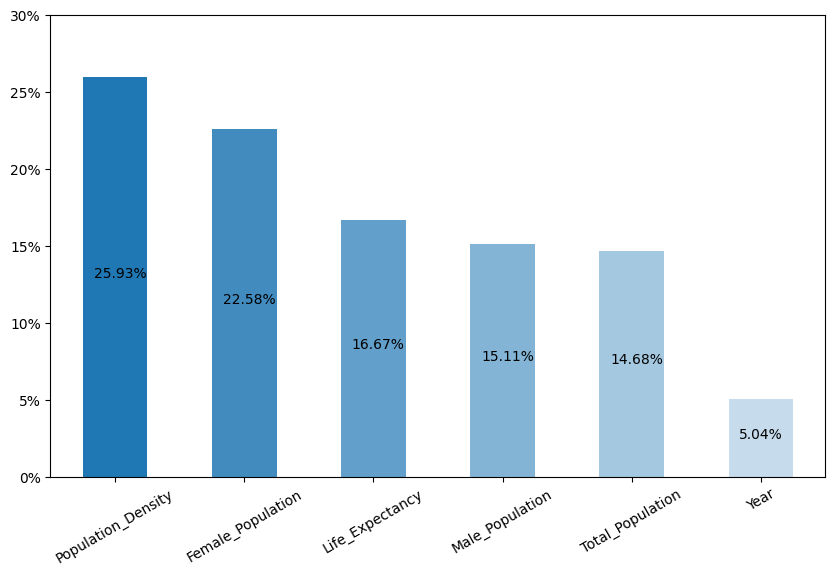

In [80]:
fig, ax = plt.subplots(figsize=(10,6))
ft_imp_barvalues.plot(kind='bar')
ax.set_facecolor("white")
ax.set_ylim(0, 30)
# ax.set_yticklabels()
yticklabels = []
for item in ax.get_yticklabels():
  yticklabels.append(f'{item.get_text()}%')
ax.set_yticklabels(yticklabels)
ax.set_xticklabels(labels=feature_importances.index, rotation=30)
alpha = 1
for bar in ax.patches:
  x = bar.get_x() + bar.get_width()/6
  y = bar.get_height() /2
  value = f'{bar.get_height()}%'
  ax.text(x, y, value)
  bar.set_alpha(alpha)
  alpha = alpha - 0.15
plt.show()

**Conclusión:**

Según nuestro análisis de importancia, la densidad de la población destaca como más influyente, seguida de la población femenina con un 25% y 24% respectivamente.
Esto sugiere que densidad de la población y el número de la población femenina son características relevantes en la incidencia de la letalidad de un país cuando evaluamos el covid-19.